## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [2]:
df1 = pd.read_csv('5F8A486_ALL_LATEST.csv')
df2 = pd.read_excel('nasional per tahun.xlsx')

In [3]:
df1 = pd.read_csv('5F8A486_ALL_LATEST.csv')

df1 = df1[df1['GEO_NAME_SHORT'].str.contains('Indonesia', na=False)]
df1 = df1.sort_values(by='DIM_TIME', ascending=True)
df1 = df1[['DIM_TIME', 'RATE_PER_100_N']].reset_index(drop=True)
df1 = df1.rename(columns={'DIM_TIME': 'Tahun', 'RATE_PER_100_N': 'Persentase_Stunting'})

In [4]:
df1

,Tahun,Persentase_Stunting
0,2000,40.4
1,2001,39.8
2,2002,39.2
3,2003,38.8
4,2004,38.4
5,2005,38.1
6,2006,37.9
7,2007,37.5
8,2008,37.1
9,2009,36.6


In [5]:
df2 = df2[['Tahun', 'PoU']].reset_index(drop=True)

In [6]:
df2

,Tahun,PoU
0,2011,16.97
1,2012,13.83
2,2013,12.36
3,2014,12.89
4,2015,10.73
5,2016,8.93
6,2017,8.23
7,2018,7.92
8,2019,7.63
9,2020,8.34


In [7]:
df = pd.merge(df1, df2, on='Tahun', how='inner')

In [8]:
df

,Tahun,Persentase_Stunting,PoU
0,2011,35.2,16.97
1,2012,34.6,13.83
2,2013,34.1,12.36
3,2014,33.6,12.89
4,2015,33.3,10.73
5,2016,33.0,8.93
6,2017,32.7,8.23
7,2018,32.5,7.92
8,2019,32.2,7.63
9,2020,31.9,8.34


In [9]:
data_preprocessing = "data_stunting.csv"
df.to_csv(data_preprocessing, index=False)  # index=False untuk menghindari menyimpan index DataFrame
print(f"DataFrame berhasil disimpan ke file {data_preprocessing}")

DataFrame berhasil disimpan ke file data_stunting.csv


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tahun                12 non-null     int64  
 1   Persentase_Stunting  12 non-null     float64
 2   PoU                  12 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 420.0 bytes


In [11]:
df.describe()

,Tahun,Persentase_Stunting,PoU
count,12.000000,12.000000,12.000000
mean,2016.500000,32.958333,10.544167
std,3.605551,1.271691,2.914726
min,2011.000000,31.000000,7.630000
25%,2013.750000,32.125000,8.312500
50%,2016.500000,32.850000,9.570000
75%,2019.250000,33.725000,12.492500
max,2022.000000,35.200000,16.970000


## Visualisasi Data

<Axes: >

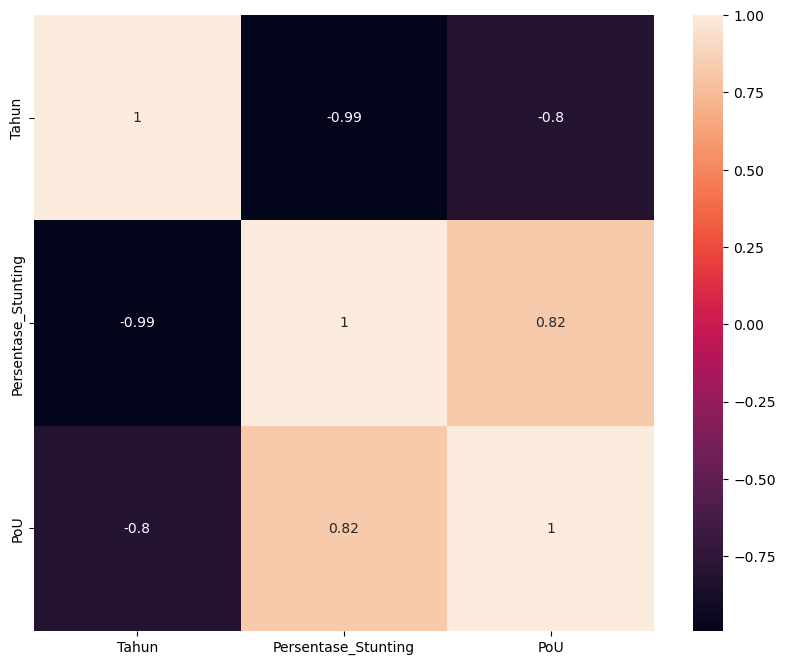

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

## Feature

In [13]:
features = ['Tahun', 'PoU']
X = df[features]
y = df['Persentase_Stunting']
X.shape, y.shape 

((12, 2), (12,))

## Split Data Training dan Testing

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Membuat Model

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)  
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
score1 = rf.score(X_test, y_test)
score1

0.8667116888193801

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# pred adalah prediksi dari model, y_test adalah nilai sebenarnya
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)



Mean Absolute Error (MAE): 0.5643333333333445
Mean Squared Error (MSE): 0.3788350000000295


## Input Data

In [21]:
input_data = np.array([[2030, 20]])

prediction = rf.predict(input_data)
prediction

c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([32.227])

## Save Model

In [22]:
import pickle

filename = 'model'
pickle.dump(rf, open(filename, 'wb'))